## Human activity를 이용한 결정트리 실습

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt

# 피처명 읽기
# features.txt 파일에는 피쳐 이름 index와 피쳐명이 공백으로 분리되어 있음
# 이름 DataFrame 롣,
# \s+ => \s : white space (공백,\n,\r,\) 한자
# + : 한개 이상
feature_name_dir=pd.read_csv(
    './UCI HAR Dataset/data/features.txt'
    ,sep='\s+'
    ,header=None
    ,names=['column_index','column_name']
)
feature_name_dir.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt

# 피처명 읽기
# features.txt 파일에는 피쳐 이름 index와 피쳐명이 공백으로 분리되어 있음
# 이름 DataFrame 롣,
# \s+ => \s : white space (공백,\n,\r,\) 한자
# + : 한개 이상
feature_name_dir=pd.read_csv(
    './UCI HAR Dataset/data/features.txt'
    ,sep='\s+'
    ,header=None
    ,names=['column_index','column_name']
)

# 중복된 피쳐명 확인

feature_dup_df = feature_name_dir.groupby(
    'column_name'
).count()

print(f"중복된 개수 확인 : {feature_dup_df[feature_dup_df['column_index']>1].count()}")

중복된 개수 확인 : column_index    42
dtype: int64


In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt

# 피처명 읽기
# features.txt 파일에는 피쳐 이름 index와 피쳐명이 공백으로 분리되어 있음
# 이름 DataFrame 롣,
# \s+ => \s : white space (공백,\n,\r,\) 한자
# + : 한개 이상
feature_name_dir=pd.read_csv(
    './UCI HAR Dataset/data/features.txt'
    ,sep='\s+'
    ,header=None
    ,names=['column_index','column_name']
)

# 중복된 피쳐명 확인

feature_dup_df = feature_name_dir.groupby(
    'column_name'
).count()

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(
        data=old_feature_name_df.groupby('column_name').cumcount()
        ,columns=['dup_cnt']
    )
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]
        ,axis=1
    )
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
   
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/data/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
   
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
   
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
   
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/data/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/data//test/X_test.txt',sep='\s+', names=feature_name)
   
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/data/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/data/test/y_test.txt',sep='\s+',header=None,names=['action'])
   
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

print('학습 데이터 구조')
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

# 행동-답 확인
print(f"행동-답 확인\n{y_train['action']}")

C:\Users\TJ\AppData\Local\Temp\ipykernel_18996\1697805845.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]


학습 데이터 구조
X_train shape : (7352, 561)
X_test shape : (2947, 561)
y_train shape : (7352, 1)
y_test shape : (2947, 1)
행동-답 확인
0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: action, Length: 7352, dtype: int64


In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt

# 피처명 읽기
# features.txt 파일에는 피쳐 이름 index와 피쳐명이 공백으로 분리되어 있음
# 이름 DataFrame 롣,
# \s+ => \s : white space (공백,\n,\r,\) 한자
# + : 한개 이상
feature_name_dir=pd.read_csv(
    './UCI HAR Dataset/data/features.txt'
    ,sep='\s+'
    ,header=None
    ,names=['column_index','column_name']
)

# 중복된 피쳐명 확인

feature_dup_df = feature_name_dir.groupby(
    'column_name'
).count()

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(
        data=old_feature_name_df.groupby('column_name').cumcount()
        ,columns=['dup_cnt']
    )
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]
        ,axis=1
    )
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
   
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/data/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
   
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
   
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
   
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/data/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/data//test/X_test.txt',sep='\s+', names=feature_name)
   
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/data/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/data/test/y_test.txt',sep='\s+',header=None,names=['action'])
   
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

#데이터 불균형 확인
#Series -> value_counts()
y_train['action'].value_counts()

C:\Users\TJ\AppData\Local\Temp\ipykernel_18996\3139469205.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]


action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [8]:
import pandas as pd
import numpy as np
import matplotlib as plt

# 피처명 읽기
# features.txt 파일에는 피쳐 이름 index와 피쳐명이 공백으로 분리되어 있음
# 이름 DataFrame 롣,
# \s+ => \s : white space (공백,\n,\r,\) 한자
# + : 한개 이상
feature_name_dir=pd.read_csv(
    './UCI HAR Dataset/data/features.txt'
    ,sep='\s+'
    ,header=None
    ,names=['column_index','column_name']
)

# 중복된 피쳐명 확인

feature_dup_df = feature_name_dir.groupby(
    'column_name'
).count()

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(
        data=old_feature_name_df.groupby('column_name').cumcount()
        ,columns=['dup_cnt']
    )
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]
        ,axis=1
    )
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
   
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/data/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
   
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
   
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
   
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/data/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/data//test/X_test.txt',sep='\s+', names=feature_name)
   
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/data/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/data/test/y_test.txt',sep='\s+',header=None,names=['action'])
   
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # 정확도 점수

# 아래 코드를 반복 실행할 때마다 예측 결과가 동일하게 나오게 해야한다. : random_state
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(pred,y_test)
print(f'결정 트리 예측 정확도 : {accuracy}')

C:\Users\TJ\AppData\Local\Temp\ipykernel_18996\3714850793.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]


결정 트리 예측 정확도 : 0.8547675602307431


In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt

# 피처명 읽기
# features.txt 파일에는 피쳐 이름 index와 피쳐명이 공백으로 분리되어 있음
# 이름 DataFrame 롣,
# \s+ => \s : white space (공백,\n,\r,\) 한자
# + : 한개 이상
feature_name_dir=pd.read_csv(
    './UCI HAR Dataset/data/features.txt'
    ,sep='\s+'
    ,header=None
    ,names=['column_index','column_name']
)

# 중복된 피쳐명 확인

feature_dup_df = feature_name_dir.groupby(
    'column_name'
).count()

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(
        data=old_feature_name_df.groupby('column_name').cumcount()
        ,columns=['dup_cnt']
    )
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]
        ,axis=1
    )
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
   
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/data/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
   
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
   
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
   
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/data/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/data//test/X_test.txt',sep='\s+', names=feature_name)
   
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/data/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/data/test/y_test.txt',sep='\s+',header=None,names=['action'])
   
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # 정확도 점수

# 아래 코드를 반복 실행할 때마다 예측 결과가 동일하게 나오게 해야한다. : random_state
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(pred,y_test)
# print(f'결정 트리 예측 정확도 : {accuracy}')
# y_test['action'].value_counts()

# 튜닝 : 하이퍼파라미티
print('Decision Tree 기본 하이퍼 파라미터 :\n',dt_clf.get_params())

C:\Users\TJ\AppData\Local\Temp\ipykernel_18996\2412195363.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]


Decision Tree 기본 하이퍼 파라미터 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt

# 피처명 읽기
# features.txt 파일에는 피쳐 이름 index와 피쳐명이 공백으로 분리되어 있음
# 이름 DataFrame 롣,
# \s+ => \s : white space (공백,\n,\r,\) 한자
# + : 한개 이상
feature_name_dir=pd.read_csv(
    './UCI HAR Dataset/data/features.txt'
    ,sep='\s+'
    ,header=None
    ,names=['column_index','column_name']
)

# 중복된 피쳐명 확인

feature_dup_df = feature_name_dir.groupby(
    'column_name'
).count()

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(
        data=old_feature_name_df.groupby('column_name').cumcount()
        ,columns=['dup_cnt']
    )
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]
        ,axis=1
    )
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
   
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/data/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
   
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
   
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
   
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/data/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/data//test/X_test.txt',sep='\s+', names=feature_name)
   
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/data/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/data/test/y_test.txt',sep='\s+',header=None,names=['action'])
   
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # 정확도 점수

# 아래 코드를 반복 실행할 때마다 예측 결과가 동일하게 나오게 해야한다. : random_state
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(pred,y_test)
# print(f'결정 트리 예측 정확도 : {accuracy}')
# y_test['action'].value_counts()

# 튜닝 : 하이퍼파라미티
# print('Decision Tree 기본 하이퍼 파라미터 :\n',dt_clf.get_params())

# 하이퍼파라미티 튜닝 : GridSearchCV(), max_depth로 BEST 찾기
from sklearn.model_selection import GridSearchCV

grid_params={
    'max_depth':[6,8,10,12,16,20,24]
}

grid_cv=GridSearchCV(
    dt_clf # 모델 : 학습할 알고리즘
    ,param_grid=grid_params
    ,scoring='accuracy' #정확도로 평가
    ,cv=5
    ,verbose=1
)

grid_cv.fit(X_train,y_train)


C:\Users\TJ\AppData\Local\Temp\ipykernel_18996\2541396346.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]


Fitting 5 folds for each of 7 candidates, totalling 35 fits


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

# 피처명 읽기
# features.txt 파일에는 피쳐 이름 index와 피쳐명이 공백으로 분리되어 있음
# 이름 DataFrame 롣,
# \s+ => \s : white space (공백,\n,\r,\) 한자
# + : 한개 이상
feature_name_dir=pd.read_csv(
    './UCI HAR Dataset/data/features.txt'
    ,sep='\s+'
    ,header=None
    ,names=['column_index','column_name']
)

# 중복된 피쳐명 확인

feature_dup_df = feature_name_dir.groupby(
    'column_name'
).count()

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(
        data=old_feature_name_df.groupby('column_name').cumcount()
        ,columns=['dup_cnt']
    )
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]
        ,axis=1
    )
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
   
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/data/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
   
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
   
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
   
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/data/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/data//test/X_test.txt',sep='\s+', names=feature_name)
   
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/data/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/data/test/y_test.txt',sep='\s+',header=None,names=['action'])
   
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # 정확도 점수

# 아래 코드를 반복 실행할 때마다 예측 결과가 동일하게 나오게 해야한다. : random_state
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(pred,y_test)
# print(f'결정 트리 예측 정확도 : {accuracy}')
# y_test['action'].value_counts()

# 튜닝 : 하이퍼파라미티
# print('Decision Tree 기본 하이퍼 파라미터 :\n',dt_clf.get_params())

# 하이퍼파라미티 튜닝 : GridSearchCV(), max_depth로 BEST 찾기
from sklearn.model_selection import GridSearchCV

grid_params={
    'max_depth':[6,8,10,12,16,20,24]
}

grid_cv=GridSearchCV(
    dt_clf # 모델 : 학습할 알고리즘
    ,param_grid=grid_params
    ,scoring='accuracy' #정확도로 평가
    ,cv=5
    ,verbose=1
    ,n_jobs=-1
)

grid_cv.fit(X_train,y_train)

# 평균 정확도, 베스트 파라미터 확인
print(f'최고 평균 정확도 : {grid_cv.best_score_}')
print(f'베세트 파라미터 : {grid_cv.best_params_}')

C:\Users\TJ\AppData\Local\Temp\ipykernel_10232\3869385079.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]


Fitting 5 folds for each of 7 candidates, totalling 35 fits
최고 평균 정확도 : 0.8512089975351118
베세트 파라미터 : {'max_depth': 10}


In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt

# 피처명 읽기
# features.txt 파일에는 피쳐 이름 index와 피쳐명이 공백으로 분리되어 있음
# 이름 DataFrame 롣,
# \s+ => \s : white space (공백,\n,\r,\) 한자
# + : 한개 이상
feature_name_dir=pd.read_csv(
    './UCI HAR Dataset/data/features.txt'
    ,sep='\s+'
    ,header=None
    ,names=['column_index','column_name']
)

# 중복된 피쳐명 확인

feature_dup_df = feature_name_dir.groupby(
    'column_name'
).count()

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(
        data=old_feature_name_df.groupby('column_name').cumcount()
        ,columns=['dup_cnt']
    )
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]
        ,axis=1
    )
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
   
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/data/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
   
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
   
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
   
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/data/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/data//test/X_test.txt',sep='\s+', names=feature_name)
   
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/data/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/data/test/y_test.txt',sep='\s+',header=None,names=['action'])
   
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # 정확도 점수

# 아래 코드를 반복 실행할 때마다 예측 결과가 동일하게 나오게 해야한다. : random_state
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(pred,y_test)
# print(f'결정 트리 예측 정확도 : {accuracy}')
# y_test['action'].value_counts()

# 튜닝 : 하이퍼파라미티
# print('Decision Tree 기본 하이퍼 파라미터 :\n',dt_clf.get_params())

# 하이퍼파라미티 튜닝 : GridSearchCV(), max_depth로 BEST 찾기
from sklearn.model_selection import GridSearchCV

grid_params={
    'max_depth':[2,4,6,8,10,12,16,20,24]
}

grid_cv=GridSearchCV(
    dt_clf # 모델 : 학습할 알고리즘
    ,param_grid=grid_params
    ,scoring='accuracy' #정확도로 평가
    ,cv=5
    ,n_jobs=-1
)

grid_cv.fit(X_train,y_train)

# 평균 정확도, 베스트 파라미터 확인
# print(f'최고 평균 정확도 : {grid_cv.best_score_}')
# print(f'베스트 파라미터 : {grid_cv.best_params_}')

params={
    'max_depth':[8,10,12,16,20,24]
    ,'min_samples_split':[12,14,16,18,20,22,24]
}

grid_cv_params=GridSearchCV(
    dt_clf
    ,param_grid=params
    ,scoring='accuracy'
    ,cv=5
    ,n_jobs=-1
)

grid_cv_params.fit(X_train,y_train)

# 평균 정확도, 베스트 파라미터 확인
# print(f'min_samples_split가 포함된 최고 평균 정확도 : {grid_cv_params.best_score_}')
# print(f'min_samples_split가 포함된 최적 하이퍼 파라미터 : {grid_cv_params.best_params_}')

# 일반화 성능 확인
best_df_clf=grid_cv_params.best_estimator_
pred1=best_df_clf.predict(X_test)
acc=accuracy_score(pred1,y_test)
print(f'일반화 성능 확인 : {acc}')

C:\Users\TJ\AppData\Local\Temp\ipykernel_18996\2761609897.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]


일반화 성능 확인 : 0.8588394977943672


In [12]:
# 일반화 성능 확인
best_dt_clf=grid_cv_params.best_estimator_
# print(best_dt_clf)
pred1=best_dt_clf.predict(X_test)
acc=accuracy_score(pred1,y_test)
# print(f'일반화 성능 확인 : {acc}')

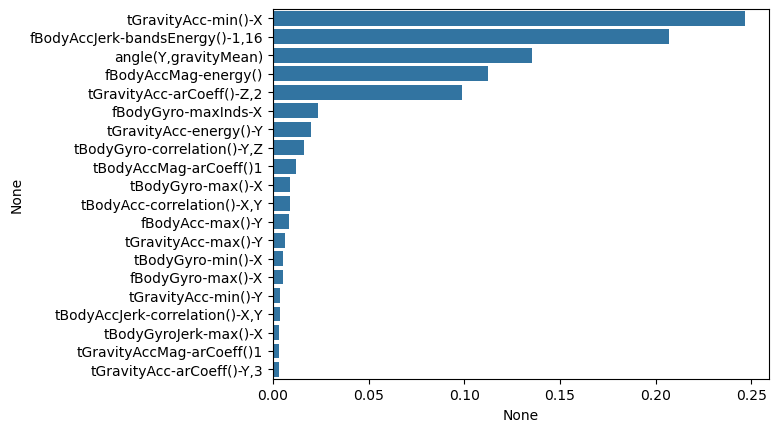

In [13]:
# 피쳐 : 561개
# 피쳐 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt
ftr_importance_values= best_dt_clf.feature_importances_
ftr_important=pd.Series(
    ftr_importance_values
    ,index=X_train.columns
)
ftr_top20=ftr_important.sort_values(
    ascending=False
)[:20]

sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

In [14]:
top20_col_names=ftr_top20.index.tolist()
# X_train[top20_col_names].head()
# X_test[top20_col_names].head()

X_train_top20=X_train[top20_col_names]
X_test_top20=X_test[top20_col_names]


print(f'X_train의 shape : {X_train.shape}')
print(f'X_train_top20의 shape : {X_train_top20.shape}')

print(f'X_test의 shape : {X_test.shape}')
print(f'X_test_top20의 shape : {X_test_top20.shape}')

X_train의 shape : (7352, 561)
X_train_top20의 shape : (7352, 20)
X_test의 shape : (2947, 561)
X_test_top20의 shape : (2947, 20)


In [17]:
params_top_20={
    'max_depth':[8,10,12,16,20,24]
    ,'min_samples_split':[12,14,16,18,20,22,24]
}

grid_cv_params_top_20=GridSearchCV(
    dt_clf
    ,param_grid=params_top_20
    ,scoring='accuracy'
    ,cv=5
    ,n_jobs=-1
)

grid_cv_params_top_20.fit(X_train,y_train)

# 평균 정확도, 베스트 파라미터 확인
print(f'min_samples_split가 포함된 최고 평균 정확도 : {grid_cv_params_top_20.best_score_}')
print(f'min_samples_split가 포함된 최적 하이퍼 파라미터 : {grid_cv_params_top_20.best_params_}')

min_samples_split가 포함된 최고 평균 정확도 : 0.8554252047521933
min_samples_split가 포함된 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_split': 18}
